In [48]:
import pandas as pd
import json
from matplotlib import pyplot as plt
from scipy import stats
import base64
import numpy as np
import requests

I'll need to get Spotify data for my report, but first I must obtain my Spotify authorization keys.

In [49]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 2A5E-5FC9

 Directory of C:\Users\shep4\EMAT-FALL22

12/02/2022  06:34 PM    <DIR>          .
11/01/2022  10:28 AM    <DIR>          ..
12/02/2022  12:44 PM               205 .cache
12/02/2022  10:12 AM    <DIR>          .ipynb_checkpoints
10/20/2022  11:07 AM            48,817 10-18_in-class_spotify.ipynb
10/23/2022  11:38 AM            39,806 10-18_in-class-Copy1.ipynb
10/27/2022  11:11 AM            37,345 10-27_in-class.ipynb
10/06/2022  10:19 AM             8,378 10-4_in-class.ipynb
10/06/2022  11:14 AM            27,295 10-6_in-class.ipynb
11/01/2022  11:06 AM            51,208 11-1_in-class.ipynb
11/10/2022  12:14 PM            13,121 11-10_in-class.ipynb
11/17/2022  12:05 PM            40,714 11-17_in-class.ipynb
11/22/2022  05:10 PM               589 11-3_in-class.ipynb
09/01/2022  10:24 AM               732 9-1_in-class.ipynb
11/23/2022  01:18 PM             8,773 audio_features.csv
11/01/2022  10:09 AM            77,889 

In [50]:
keys = pd.read_csv("Spotify-Keys_10-18-22.txt", header = 0, sep = ",")

In [51]:
appid = keys['Client_ID'][0]

In [52]:
appsecret = keys['Client_Secret'][0]

In [53]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

In [54]:
headers = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [55]:
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [56]:
response = requests.post(access_token_url, headers = headers, data = payload)

In [57]:
session_token = response.json()['access_token']

In [58]:
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

I was able to estimate the number of the most well-known fall and Halloween-themed songs from a recent article I discovered, which was from this past October. I then used this article to make a playlist, ordering each song according to how popular it was at the time. I'll now collect the information from this playlist.

In [59]:
spooky_id = '6xuHrxObOuzSAgfuJpNyLm'

Playlist of the Fall/Halloween music I put together = 6xuHrxObOuzSAgfuJpNyLm

In [60]:
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}".format(spooky_id)

In [61]:
spooky_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)

In [62]:
spooky_tracks.status_code

200

In [63]:
spooky_dict = json.loads(spooky_tracks.text)

In [64]:
spooky_dict.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

In [65]:
spooky_dict['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [66]:
spooky_dict['tracks']['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [67]:
spooky_track_ids = [x['track'] for x in spooky_dict['tracks']['items']]

In [68]:
spooky = pd.DataFrame(spooky_track_ids)

Every song on the created playlist will now be available.

In [69]:
spooky.head()

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,357266,False,False,{'isrc': 'USSM19902989'},{'spotify': 'https://open.spotify.com/track/3S...,https://api.spotify.com/v1/tracks/3S2R0EVwBSAV...,3S2R0EVwBSAVMd5UMgKTL0,False,Thriller,73,https://p.scdn.co/mp3-preview/04e2e4889d434ec0...,True,4,track,spotify:track:3S2R0EVwBSAVMd5UMgKTL0
1,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,239133,False,False,{'isrc': 'USAR18400117'},{'spotify': 'https://open.spotify.com/track/56...,https://api.spotify.com/v1/tracks/569uHYIB0X32...,569uHYIB0X324FZOBEhvit,False,Ghostbusters,70,https://p.scdn.co/mp3-preview/9f4aa5928f0ebd49...,True,1,track,spotify:track:569uHYIB0X324FZOBEhvit
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,192040,False,False,{'isrc': 'GBBBA7360050'},{'spotify': 'https://open.spotify.com/track/0x...,https://api.spotify.com/v1/tracks/0xxZY5C9xxij...,0xxZY5C9xxij3D1HkzbnfC,False,Monster Mash,70,None,True,1,track,spotify:track:0xxZY5C9xxij3D1HkzbnfC
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,308120,False,False,{'isrc': 'USSM17600477'},{'spotify': 'https://open.spotify.com/track/5Q...,https://api.spotify.com/v1/tracks/5QTxFnGygVM4...,5QTxFnGygVM4jFQiBovmRo,False,(Don't Fear) The Reaper,76,https://p.scdn.co/mp3-preview/7506c69eeadd2ba6...,True,3,track,spotify:track:5QTxFnGygVM4jFQiBovmRo
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,208400,False,False,{'isrc': 'AUAP07900028'},{'spotify': 'https://open.spotify.com/track/2z...,https://api.spotify.com/v1/tracks/2zYzyRzz6pRm...,2zYzyRzz6pRmhPzyfMEC8s,False,Highway to Hell,84,https://p.scdn.co/mp3-preview/3589df13595d1ab1...,True,1,track,spotify:track:2zYzyRzz6pRmhPzyfMEC8s


Given the volume of information provided, I will need to remove some of it in order to get the information I need.

In [70]:
spooky_1 = spooky.drop(columns = ['available_markets', 'disc_number', 'episode', 'external_ids', 'is_local', 'preview_url', 'track', 'track_number', 'type','available_markets', 'external_urls', 'href', 'type', 'uri'])


In [71]:
spooky_1.head()

,album,artists,duration_ms,explicit,id,name,popularity
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,357266,False,3S2R0EVwBSAVMd5UMgKTL0,Thriller,73
1,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,239133,False,569uHYIB0X324FZOBEhvit,Ghostbusters,70
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,192040,False,0xxZY5C9xxij3D1HkzbnfC,Monster Mash,70
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,308120,False,5QTxFnGygVM4jFQiBovmRo,(Don't Fear) The Reaper,76
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,208400,False,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,84


There is still a sizable amount of data, but I will have to organize some of it to locate the data I seek.

In [72]:
pd.DataFrame(spooky_1['artists'][0])

,external_urls,href,id,name,type,uri
0,{'spotify': 'https://open.spotify.com/artist/3...,https://api.spotify.com/v1/artists/3fMbdgg4jU1...,3fMbdgg4jU18AjLCKBhRSm,Michael Jackson,artist,spotify:artist:3fMbdgg4jU18AjLCKBhRSm


In [73]:
spooky_1['artists'][0][0]['name']

'Michael Jackson'

In [74]:
artist = [x[0]['name'] for x in spooky['artists']]

In [75]:
artists_name =  pd.DataFrame(artist)

In [76]:
artists_name.head()

,0
0,Michael Jackson
1,Ray Parker Jr.
2,"Bobby ""Boris"" Pickett"
3,Blue Öyster Cult
4,AC/DC


In [77]:
spooky_1['artists_name'] = artists_name

In [78]:
spooky_1.drop(columns = ['artists']).head()

,album,duration_ms,explicit,id,name,popularity,artists_name
0,"{'album_type': 'album', 'artists': [{'external...",357266,False,3S2R0EVwBSAVMd5UMgKTL0,Thriller,73,Michael Jackson
1,"{'album_type': 'compilation', 'artists': [{'ex...",239133,False,569uHYIB0X324FZOBEhvit,Ghostbusters,70,Ray Parker Jr.
2,"{'album_type': 'album', 'artists': [{'external...",192040,False,0xxZY5C9xxij3D1HkzbnfC,Monster Mash,70,"Bobby ""Boris"" Pickett"
3,"{'album_type': 'album', 'artists': [{'external...",308120,False,5QTxFnGygVM4jFQiBovmRo,(Don't Fear) The Reaper,76,Blue Öyster Cult
4,"{'album_type': 'album', 'artists': [{'external...",208400,False,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,84,AC/DC


In [79]:
spooky_1['album_name'] = spooky_1['name']

In [85]:
Hal_pop = spooky_1.drop(columns = ['album', 'explicit', 'artists'])

In [86]:
Hal_pop.head()

,duration_ms,id,name,popularity,artists_name,album_name
0,357266,3S2R0EVwBSAVMd5UMgKTL0,Thriller,73,Michael Jackson,Thriller
1,239133,569uHYIB0X324FZOBEhvit,Ghostbusters,70,Ray Parker Jr.,Ghostbusters
2,192040,0xxZY5C9xxij3D1HkzbnfC,Monster Mash,70,"Bobby ""Boris"" Pickett",Monster Mash
3,308120,5QTxFnGygVM4jFQiBovmRo,(Don't Fear) The Reaper,76,Blue Öyster Cult,(Don't Fear) The Reaper
4,208400,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,84,AC/DC,Highway to Hell


Here is the final dataframe for the first playlist

In [88]:
Hal_pop_ids = Hal_pop['id']

In [89]:
Hal_pop_strings = ','.join(str(x) for x in Hal_pop_ids)
Hal_pop_strings

'3S2R0EVwBSAVMd5UMgKTL0,569uHYIB0X324FZOBEhvit,0xxZY5C9xxij3D1HkzbnfC,5QTxFnGygVM4jFQiBovmRo,2zYzyRzz6pRmhPzyfMEC8s,01YROQCnF1AQm7SCWJmD2o,6kotXaSQaGYxE62hVpdHWu,6hci8n9UowepjRmCc6CKTv,2aRjuScpka878tUWOsLYpQ,4YMQXzscifAREG0a7KNGhB,1h2xVEoJORqrg71HocgqXd,3sLhMSePzxSrmxluIqeoAZ,5qRJD1yaLJ5s0J3JpbgnwA,1i6N76fftMZhijOzFQ5ZtL,1Ud6moTC0KyXMq1Oxfien0,2E7W1X4maFFcjHrVrFA7Vs,2h47SG8bNphmicAll4H9RV,7EZC6E7UjZe63f1jRmkWxt,4WFeJTXNHIS2wURtwlAkhu,743DaI0d44SpwV2ArTPGmy'

Now I will collect the audio features for the Fall/Halloween playlist

In [90]:
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(Hal_pop_strings)

In [92]:
Hal_features = requests.get(track_features_endpoint, headers = session_header)

In [93]:
Hal_features.status_code

200

In [96]:
Hal_dict = json.loads(Hal_features.text)

In [97]:
Hal_dict.keys()

dict_keys(['audio_features'])

In [101]:
Spooky_af = Hal_dict['audio_features']

In [102]:
Spooky_df = pd.DataFrame(Spooky_af)

In [103]:
Spooky_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.773,0.859,11,-4.913,1,0.0747,0.0855,0.000187,0.914,0.813,118.459,audio_features,3S2R0EVwBSAVMd5UMgKTL0,spotify:track:3S2R0EVwBSAVMd5UMgKTL0,https://api.spotify.com/v1/tracks/3S2R0EVwBSAV...,https://api.spotify.com/v1/audio-analysis/3S2R...,357267,4
1,0.778,0.719,4,-9.698,1,0.0345,0.0123,0.026200,0.297,0.729,115.400,audio_features,569uHYIB0X324FZOBEhvit,spotify:track:569uHYIB0X324FZOBEhvit,https://api.spotify.com/v1/tracks/569uHYIB0X32...,https://api.spotify.com/v1/audio-analysis/569u...,239133,4
2,0.541,0.504,11,-14.191,0,0.4570,0.3750,0.000000,0.421,0.707,68.482,audio_features,0xxZY5C9xxij3D1HkzbnfC,spotify:track:0xxZY5C9xxij3D1HkzbnfC,https://api.spotify.com/v1/tracks/0xxZY5C9xxij...,https://api.spotify.com/v1/audio-analysis/0xxZ...,192040,4
3,0.333,0.927,9,-8.550,0,0.0733,0.0029,0.000208,0.297,0.385,141.466,audio_features,5QTxFnGygVM4jFQiBovmRo,spotify:track:5QTxFnGygVM4jFQiBovmRo,https://api.spotify.com/v1/tracks/5QTxFnGygVM4...,https://api.spotify.com/v1/audio-analysis/5QTx...,308120,4
4,0.574,0.913,6,-4.793,0,0.1330,0.0610,0.001580,0.156,0.423,115.728,audio_features,2zYzyRzz6pRmhPzyfMEC8s,spotify:track:2zYzyRzz6pRmhPzyfMEC8s,https://api.spotify.com/v1/tracks/2zYzyRzz6pRm...,https://api.spotify.com/v1/audio-analysis/2zYz...,208400,4


Now to blend both dataframes

In [104]:
Hal_pop['danceability'] = Spooky_df['danceability']
Hal_pop['energy'] = Spooky_df['energy']
Hal_pop['key'] = Spooky_df['key']
Hal_pop['loudness'] = Spooky_df['loudness']
Hal_pop['mode'] = Spooky_df['mode']
Hal_pop['speechiness'] = Spooky_df['speechiness']
Hal_pop['acousticness'] = Spooky_df['acousticness']
Hal_pop['instrumentalness'] = Spooky_df['instrumentalness']
Hal_pop['liveness'] = Spooky_df['liveness']
Hal_pop['valence'] = Spooky_df['valence']
Hal_pop['tempo'] = Spooky_df['tempo']
Hal_pop['id'] = Spooky_df['id']
Hal_pop['duration_ms'] = Spooky_df['duration_ms']
Hal_pop['time_signature'] = Spooky_df['time_signature']

In [105]:
Hal_pop.head()

,duration_ms,id,name,popularity,artists_name,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,357267,3S2R0EVwBSAVMd5UMgKTL0,Thriller,73,Michael Jackson,Thriller,0.773,0.859,11,-4.913,1,0.0747,0.0855,0.000187,0.914,0.813,118.459,4
1,239133,569uHYIB0X324FZOBEhvit,Ghostbusters,70,Ray Parker Jr.,Ghostbusters,0.778,0.719,4,-9.698,1,0.0345,0.0123,0.026200,0.297,0.729,115.400,4
2,192040,0xxZY5C9xxij3D1HkzbnfC,Monster Mash,70,"Bobby ""Boris"" Pickett",Monster Mash,0.541,0.504,11,-14.191,0,0.4570,0.3750,0.000000,0.421,0.707,68.482,4
3,308120,5QTxFnGygVM4jFQiBovmRo,(Don't Fear) The Reaper,76,Blue Öyster Cult,(Don't Fear) The Reaper,0.333,0.927,9,-8.550,0,0.0733,0.0029,0.000208,0.297,0.385,141.466,4
4,208400,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,84,AC/DC,Highway to Hell,0.574,0.913,6,-4.793,0,0.1330,0.0610,0.001580,0.156,0.423,115.728,4


In [109]:
winter_id = '74CP5rG6MyY0RRnCgbh4DN'
album_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}".format(winter_id)
winter_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(winter_tracks.status_code)
winter_dict = json.loads(winter_tracks.text)
winter_dict.keys()
winter_dict['tracks'].keys()
winter_dict['tracks']['items'][0].keys()
winter_track_ids = [x['track'] for x in winter_dict['tracks']['items']]
winter = pd.DataFrame(winter_track_ids)
winter.head()

200


,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,241106,False,False,{'isrc': 'USSM19400325'},{'spotify': 'https://open.spotify.com/track/0b...,https://api.spotify.com/v1/tracks/0bYg9bo50gSs...,0bYg9bo50gSsH3LtXe2SQn,False,All I Want for Christmas Is You,92,https://p.scdn.co/mp3-preview/0d3f660241b04b1e...,True,2,track,spotify:track:0bYg9bo50gSsH3LtXe2SQn
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,126266,False,False,{'isrc': 'USMC15848998'},{'spotify': 'https://open.spotify.com/track/2E...,https://api.spotify.com/v1/tracks/2EjXfH91m7f8...,2EjXfH91m7f8HiJN1yQg97,False,Rockin' Around The Christmas Tree,89,None,True,1,track,spotify:track:2EjXfH91m7f8HiJN1yQg97
2,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,130973,False,False,{'isrc': 'USMC15746480'},{'spotify': 'https://open.spotify.com/track/7v...,https://api.spotify.com/v1/tracks/7vQbuQcyTflf...,7vQbuQcyTflfCIOu3Uzzya,False,Jingle Bell Rock,88,None,True,1,track,spotify:track:7vQbuQcyTflfCIOu3Uzzya
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,192160,False,False,{'isrc': 'USCA29900551'},{'spotify': 'https://open.spotify.com/track/4P...,https://api.spotify.com/v1/tracks/4PS1e8f2LvuT...,4PS1e8f2LvuTFgUs1Cn3ON,False,The Christmas Song (Merry Christmas To You),81,None,True,1,track,spotify:track:4PS1e8f2LvuTFgUs1Cn3ON
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,135533,False,False,{'isrc': 'USMC16414508'},{'spotify': 'https://open.spotify.com/track/77...,https://api.spotify.com/v1/tracks/77khP2fIVhSW...,77khP2fIVhSW23NwxrRluh,False,A Holly Jolly Christmas,83,None,True,1,track,spotify:track:77khP2fIVhSW23NwxrRluh


I put everything together so it was easier to read but after the next code cell will be the completed dataframe for the Winter playlists that I created. 

In [111]:
winter1 = winter.drop(columns = ['available_markets', 'disc_number', 'episode', 'external_ids', 'is_local', 'preview_url', 'track', 'track_number', 'type','available_markets', 'external_urls', 'href', 'type', 'uri'])
winter1.head()
pd.DataFrame(winter1['artists'][0])
winter1['artists'][0][0]['name']
artist1 = [x[0]['name'] for x in spooky['artists']]
artists1_name =  pd.DataFrame(artist1)
artists1_name.head()
winter1['artists_name'] = artists1_name
winter1.drop(columns = ['artists']).head()
winter1['album_name'] = winter1['name']

In [120]:
Win_pop = winter1.drop(columns = ['album', 'explicit', 'artists'])
Win_pop.head()
Win_pop_ids = Win_pop['id']
Win_pop_strings = ','.join(str(x) for x in Win_pop_ids)
Win_pop_strings

'0bYg9bo50gSsH3LtXe2SQn,2EjXfH91m7f8HiJN1yQg97,7vQbuQcyTflfCIOu3Uzzya,4PS1e8f2LvuTFgUs1Cn3ON,77khP2fIVhSW23NwxrRluh,0oPdaY4dXtc3ZsaG17V972,5hslUAKq9I9CG2bAulFkHN,2FRnf9qhLbvw8fu4IBXx78,4so0Wek9Ig1p6CRCHuINwW,2uFaJJtFpPDc5Pa95XzTvg,3sBnSBnzpEYKpJYGsAIbup,1dtIaSlyrLI04sqYa8nLyN,4z8sz6E4YyFuEkv5o7IJni,5a1iz510sv2W9Dt1MvFd5R,5ASM6Qjiav2xPe7gRkQMsQ,4hAkwE0k1MlzDoOIf9J8ty,7xapw9Oy21WpfEcib2ErSA,3QiAAp20rPC3dcAtKtMaqQ,0O4vuJynWVVdyvoHvZtnk3,5aj4UEKeW7T3eI4ETaN7Me,0lizgQ7Qw35od7CYaoMBZb,6ZgigeSB0XUMqc0jjzaq6d,3sDdyBHQ60Cs1opmIyRvhp,3YZE5qDV7u1ZD1gZc47ZeR,25leEEaz1gIpp7o21Fqyjo,0HZk0QsXPhMNAWNDR3rYE8,3QIoEi8Enr9uHffwInGIsC,3bMfUUpzUzqWp9II00yRhE,4p401d3dipTVawmjZ2AXsx,0247StOpd3AkeBQzANX4Zf,1foCxQtxBweJtZmdxhEHVO,1uh1iaMqBdx4XyrXhssKGD,33EcmYsTQVIGRGnGPOfTwu,1msuiw6pnXYfxZ7Edyit9U,6s2wpWPFPAgKg2LXxi1Oee,7BvCDrlYwJ5D9RUqvvs3BT,5xlS0QkVrSH7ssEbBgBzbM,2pXpURmn6zC5ZYDMms6fwa,4HEOgBHRCExyYVeTyrXsnL,2pnPe4pJtq7689i5ydzvJJ,6tjituizSxwSmBB5vtgHZE,0hvN2v6fAcB6xWyW7UaooA,2QpN1ZVw8eJO5f7WcvUA1k,47ohYW8e7d

In [115]:
winter_track_strings = ','.join(str(x) for x in winter_track_ids)

In [ ]:
print(winter_track_strings)

After finishing the collected dataframe for the most popular Winter holiday songs I will collect the audio features and merge them together.

In [128]:
Win_track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(Hal_pop_strings)

In [129]:
Win_features = requests.get(Win_track_features_endpoint, headers = session_header)

In [130]:
Win_features.status_code

200

In [131]:
Win_dict = json.loads(Win_features.text)
Win_dict.keys()
Winter_af = Win_dict['audio_features']
Winter_df = pd.DataFrame(Winter_af)
Winter_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.773,0.859,11,-4.913,1,0.0747,0.0855,0.000187,0.914,0.813,118.459,audio_features,3S2R0EVwBSAVMd5UMgKTL0,spotify:track:3S2R0EVwBSAVMd5UMgKTL0,https://api.spotify.com/v1/tracks/3S2R0EVwBSAV...,https://api.spotify.com/v1/audio-analysis/3S2R...,357267,4
1,0.778,0.719,4,-9.698,1,0.0345,0.0123,0.026200,0.297,0.729,115.400,audio_features,569uHYIB0X324FZOBEhvit,spotify:track:569uHYIB0X324FZOBEhvit,https://api.spotify.com/v1/tracks/569uHYIB0X32...,https://api.spotify.com/v1/audio-analysis/569u...,239133,4
2,0.541,0.504,11,-14.191,0,0.4570,0.3750,0.000000,0.421,0.707,68.482,audio_features,0xxZY5C9xxij3D1HkzbnfC,spotify:track:0xxZY5C9xxij3D1HkzbnfC,https://api.spotify.com/v1/tracks/0xxZY5C9xxij...,https://api.spotify.com/v1/audio-analysis/0xxZ...,192040,4
3,0.333,0.927,9,-8.550,0,0.0733,0.0029,0.000208,0.297,0.385,141.466,audio_features,5QTxFnGygVM4jFQiBovmRo,spotify:track:5QTxFnGygVM4jFQiBovmRo,https://api.spotify.com/v1/tracks/5QTxFnGygVM4...,https://api.spotify.com/v1/audio-analysis/5QTx...,308120,4
4,0.574,0.913,6,-4.793,0,0.1330,0.0610,0.001580,0.156,0.423,115.728,audio_features,2zYzyRzz6pRmhPzyfMEC8s,spotify:track:2zYzyRzz6pRmhPzyfMEC8s,https://api.spotify.com/v1/tracks/2zYzyRzz6pRm...,https://api.spotify.com/v1/audio-analysis/2zYz...,208400,4


In [132]:
Win_pop['danceability'] = Winter_df['danceability']
Win_pop['energy'] = Winter_df['energy']
Win_pop['key'] = Winter_df['key']
Win_pop['loudness'] = Winter_df['loudness']
Win_pop['mode'] = Winter_df['mode']
Win_pop['speechiness'] = Winter_df['speechiness']
Win_pop['acousticness'] = Winter_df['acousticness']
Win_pop['instrumentalness'] = Winter_df['instrumentalness']
Win_pop['liveness'] = Winter_df['liveness']
Win_pop['valence'] = Winter_df['valence']
Win_pop['tempo'] = Winter_df['tempo']
Win_pop['id'] = Winter_df['id']
Win_pop['duration_ms'] = Winter_df['duration_ms']
Win_pop['time_signature'] = Winter_df['time_signature']

In [133]:
Win_pop.head()

,duration_ms,id,name,popularity,artists_name,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,357267.0,3S2R0EVwBSAVMd5UMgKTL0,All I Want for Christmas Is You,92,Michael Jackson,All I Want for Christmas Is You,0.773,0.859,11.0,-4.913,1.0,0.0747,0.0855,0.000187,0.914,0.813,118.459,4.0
1,239133.0,569uHYIB0X324FZOBEhvit,Rockin' Around The Christmas Tree,89,Ray Parker Jr.,Rockin' Around The Christmas Tree,0.778,0.719,4.0,-9.698,1.0,0.0345,0.0123,0.026200,0.297,0.729,115.400,4.0
2,192040.0,0xxZY5C9xxij3D1HkzbnfC,Jingle Bell Rock,88,"Bobby ""Boris"" Pickett",Jingle Bell Rock,0.541,0.504,11.0,-14.191,0.0,0.4570,0.3750,0.000000,0.421,0.707,68.482,4.0
3,308120.0,5QTxFnGygVM4jFQiBovmRo,The Christmas Song (Merry Christmas To You),81,Blue Öyster Cult,The Christmas Song (Merry Christmas To You),0.333,0.927,9.0,-8.550,0.0,0.0733,0.0029,0.000208,0.297,0.385,141.466,4.0
4,208400.0,2zYzyRzz6pRmhPzyfMEC8s,A Holly Jolly Christmas,83,AC/DC,A Holly Jolly Christmas,0.574,0.913,6.0,-4.793,0.0,0.1330,0.0610,0.001580,0.156,0.423,115.728,4.0


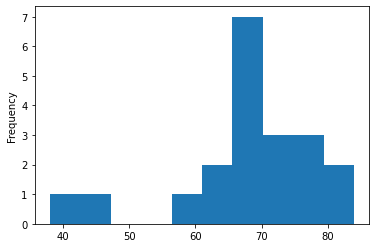

In [139]:
Halloween1 = Hal_pop['popularity'].plot.hist()
plt.show()

Here is the histogram of the Fall/Hallloween playlist popularity.

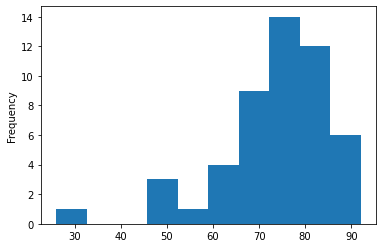

In [140]:
Winter1 = Win_pop['popularity'].plot.hist()
plt.show()

Here is the histogram of the Winter Holiday Playlist popularity.